In [1]:
!pip install fastai -q --upgrade
!pip install fastbook -q --upgrade

In [2]:
from fastai.vision.all import *
from fastbook import * 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_18.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_157.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_28.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_6.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_79.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_265.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_182.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_89.jpg')...]

In [6]:
fname = (path/"images").ls()[0]

In [7]:
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg')

In [8]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['beagle']

In [9]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
 get_items=get_image_files,
 splitter=RandomSplitter(seed=42),
 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
 item_tfms=Resize(460),
 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/'images')

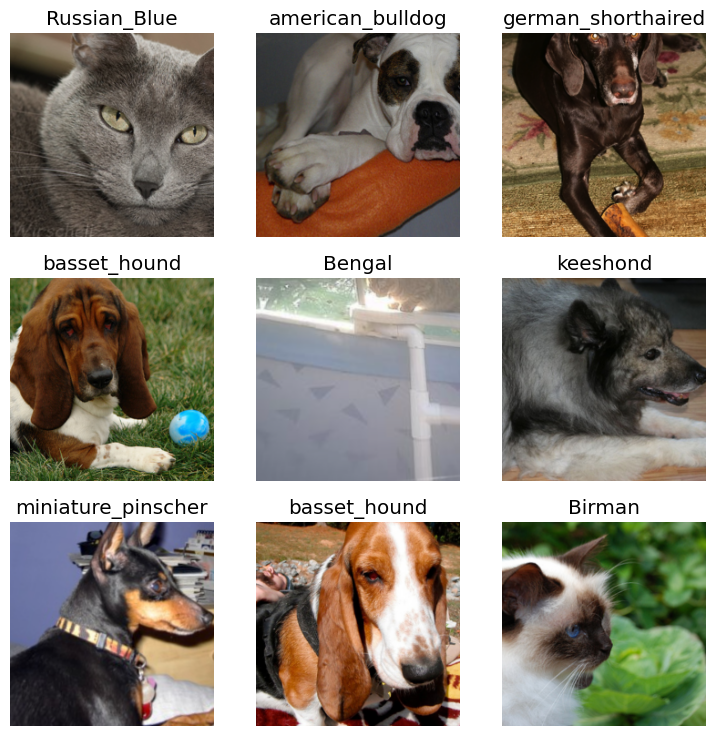

In [10]:
dls.show_batch(nrows=3, ncols=3)

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,error_rate,time
0,1.520899,0.379710,0.121786,01:01


epoch,train_loss,valid_loss,error_rate,time
0,0.468223,0.300440,0.094046,01:00
1,0.393274,0.292952,0.084574,01:01
2,0.276706,0.271634,0.081191,01:00
3,0.186267,0.226596,0.066306,01:01
4,0.122724,0.209799,0.059540,01:01


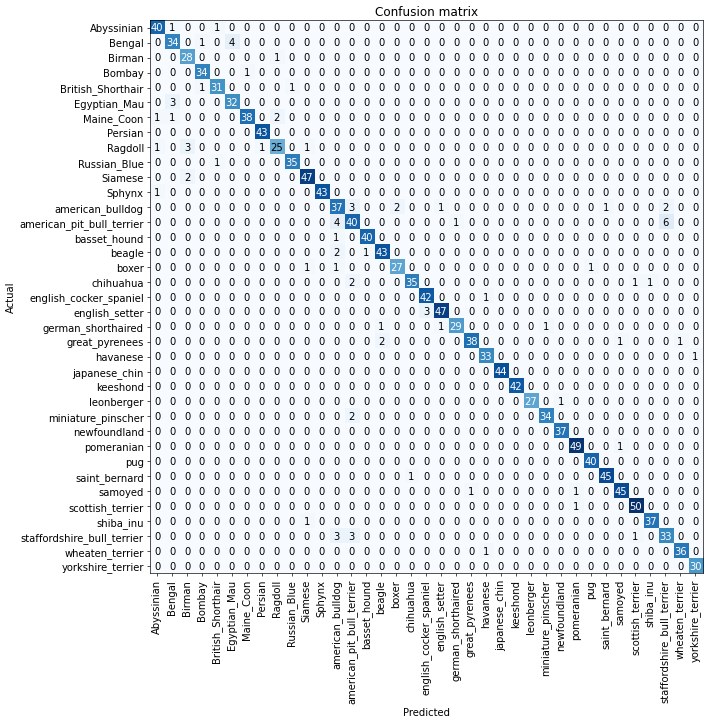

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [13]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6)]

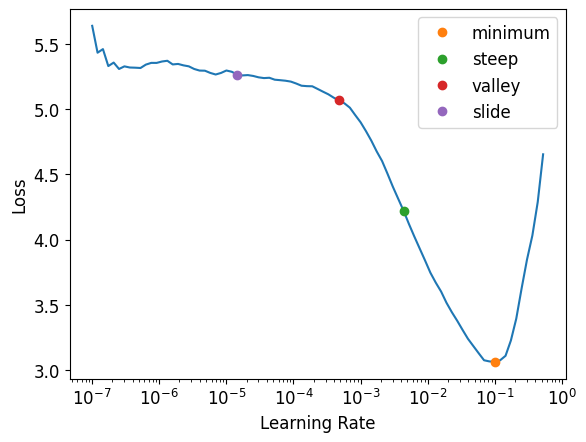

In [14]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [15]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.306338,0.342501,0.104195,00:58


epoch,train_loss,valid_loss,error_rate,time
0,0.526595,0.398535,0.120433,01:01
1,0.322007,0.249078,0.075101,01:01


In [16]:
learn.fine_tune??

In [17]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.133649,0.320559,0.103518,00:58
1,0.544138,0.269074,0.084574,00:58
2,0.326824,0.240187,0.079161,00:58


In [18]:
learn.unfreeze()

SuggestedLRs(valley=1.737800812406931e-05)

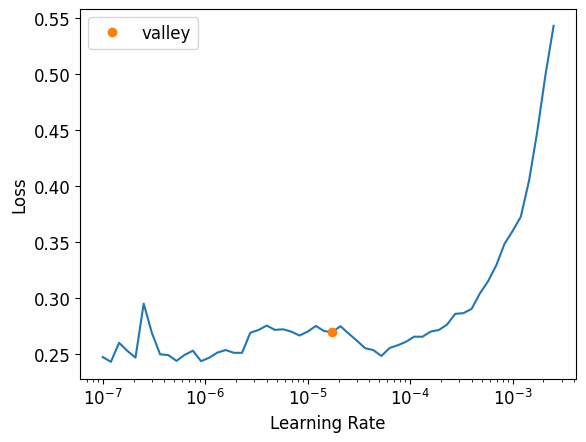

In [19]:
learn.lr_find()

In [20]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.270415,0.228242,0.079838,01:01
1,0.247251,0.214022,0.070365,01:01
2,0.212992,0.205469,0.069689,00:59
3,0.198965,0.203167,0.066306,01:01
4,0.187871,0.200965,0.064953,01:00
5,0.186414,0.198616,0.064953,01:00


In [21]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.151111,0.309335,0.100812,00:58
1,0.515914,0.258067,0.081867,00:58
2,0.327253,0.220986,0.069012,00:58


epoch,train_loss,valid_loss,error_rate,time
0,0.258719,0.221286,0.069012,01:00
1,0.257923,0.216220,0.069012,01:00
2,0.242679,0.207588,0.071042,01:00
3,0.212716,0.203268,0.071719,01:00
4,0.186305,0.197890,0.063599,01:00
5,0.154254,0.194275,0.064276,01:00
6,0.153548,0.192115,0.069012,01:00
7,0.144799,0.192457,0.064953,01:00
8,0.138675,0.191125,0.065629,01:00
9,0.131720,0.189197,0.062923,00:59
